In [1]:
import keras
import numpy as np

Using TensorFlow backend.


In [2]:
from keras.applications import vgg16, inception_v3, resnet50, mobilenet

vgg_model = vgg16.VGG16(weights='imagenet')

inception_model = inception_v3.InceptionV3(weights='imagenet')

resnet_model = resnet50.ResNet50(weights='imagenet')

mobilenet_model = mobilenet.MobileNet(weights='imagenet')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [3]:
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from keras.applications.imagenet_utils import decode_predictions
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
filename = "/Users/shreya/Documents/img2vec/example/test_images/images.jpeg"

('PIL image size', (224, 224))


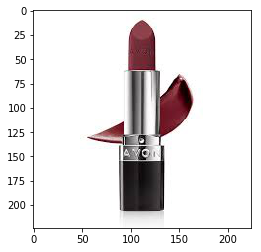

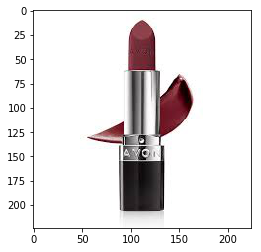

('numpy array size', (224, 224, 3))
('image batch size', (1, 224, 224, 3))


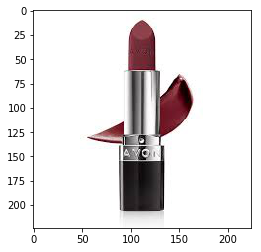

In [19]:
# load an image in PIL format
original = load_img(filename, target_size=(224, 224))
print('PIL image size',original.size)
plt.imshow(original)
plt.show()

# convert the PIL image to a numpy array
# IN PIL - image is in (width, height, channel)
# In Numpy - image is in (height, width, channel)
numpy_image = img_to_array(original)
plt.imshow(np.uint8(numpy_image))
plt.show()
print('numpy array size',numpy_image.shape)

# Convert the image / images into batch format
# expand_dims will add an extra dimension to the data at a particular axis
# We want the input matrix to the network to be of the form (batchsize, height, width, channels)
# Thus we add the extra dimension to the axis 0.
image_batch = np.expand_dims(numpy_image, axis=0)
print('image batch size', image_batch.shape)
plt.imshow(np.uint8(image_batch[0]))

In [20]:
# prepare the image for the VGG model
processed_image = vgg16.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = vgg_model.predict(processed_image)
# print predictions
# convert the probabilities to class labels
# We will get top 5 predictions which is the default
label_vgg = decode_predictions(predictions)
label_vgg

[[(u'n03676483', u'lipstick', 0.9999684),
  (u'n03314780', u'face_powder', 2.8448314e-05),
  (u'n03916031', u'perfume', 1.6621209e-06),
  (u'n04008634', u'projectile', 3.5287934e-07),
  (u'n03773504', u'missile', 2.3021366e-07)]]

In [21]:
# prepare the image for the ResNet50 model
processed_image = resnet50.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = resnet_model.predict(processed_image)

# convert the probabilities to class labels
# If you want to see the top 3 predictions, specify it using the top argument
label_resnet = decode_predictions(predictions, top=3)
label_resnet


[[(u'n03676483', u'lipstick', 0.99993837),
  (u'n03314780', u'face_powder', 2.132281e-05),
  (u'n02783161', u'ballpoint', 7.5141415e-06)]]

In [15]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[(u'n03594734', u'jean', 0.9717296),
  (u'n03623198', u'knee_pad', 0.017757429),
  (u'n03124043', u'cowboy_boot', 0.002908582),
  (u'n04370456', u'sweatshirt', 0.0021462152),
  (u'n02963159', u'cardigan', 0.00071595)]]

In [16]:
# prepare the image for the MobileNet model
processed_image = mobilenet.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = mobilenet_model.predict(processed_image)

# convert the probabilities to imagenet class labels
label_mobilenet = decode_predictions(predictions)
label_mobilenet

[[(u'n03594734', u'jean', 0.9717296),
  (u'n03623198', u'knee_pad', 0.017757429),
  (u'n03124043', u'cowboy_boot', 0.002908582),
  (u'n04370456', u'sweatshirt', 0.0021462152),
  (u'n02963159', u'cardigan', 0.00071595)]]

In [17]:
# load an image in PIL format
original = load_img(filename, target_size=(299, 299))

# Convert the PIL image into numpy array
numpy_image = img_to_array(original)

# reshape data in terms of batchsize
image_batch = np.expand_dims(numpy_image, axis=0)

# prepare the image for the Inception model
processed_image = inception_v3.preprocess_input(image_batch.copy())

# get the predicted probabilities for each class
predictions = inception_model.predict(processed_image)

# convert the probabilities to class labels
label_inception = decode_predictions(predictions)
label_inception

[[(u'n03594734', u'jean', 0.8205594),
  (u'n04370456', u'sweatshirt', 0.012390608),
  (u'n04254777', u'sock', 0.0072127525),
  (u'n02963159', u'cardigan', 0.005869023),
  (u'n02883205', u'bow_tie', 0.005747125)]]